In [32]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


In [29]:
# Membaca gambar
img = cv.imread('lifina.jpg')

In [30]:
# Mengubah warna dari BGR ke RGB
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)


In [31]:
# Rotasi 90 derajat
rows, cols = img_rgb.shape[:2]
M_rotation = cv.getRotationMatrix2D(((cols-1)/2.0, (rows-1)/2.0), 45, 1)
img_rotated = cv.warpAffine(img_rgb, M_rotation, (cols, rows))


In [33]:
# Resize dengan faktor 0.5
resized_height, resized_width = int(rows * 1), int(cols * 0.5)
img_resized = cv.resize(img_rgb, (resized_width, resized_height), interpolation=cv.INTER_CUBIC)



In [34]:
# Posisi crop
start_row, start_col = int(rows * 0.1), int(cols * 0.1)
end_row, end_col = int(rows * 0.9), int(cols * 0.9)
img_cropped = img_rgb[start_row:end_row, start_col:end_col]



In [35]:
# Flipping horizontal
img_flipped = cv.flip(img_rgb, 1)

# Translasi gambar
M_translation = np.float32([[1, 0, 50], [0, 1, 50]])
img_translated = cv.warpAffine(img_rgb, M_translation, (cols, rows))



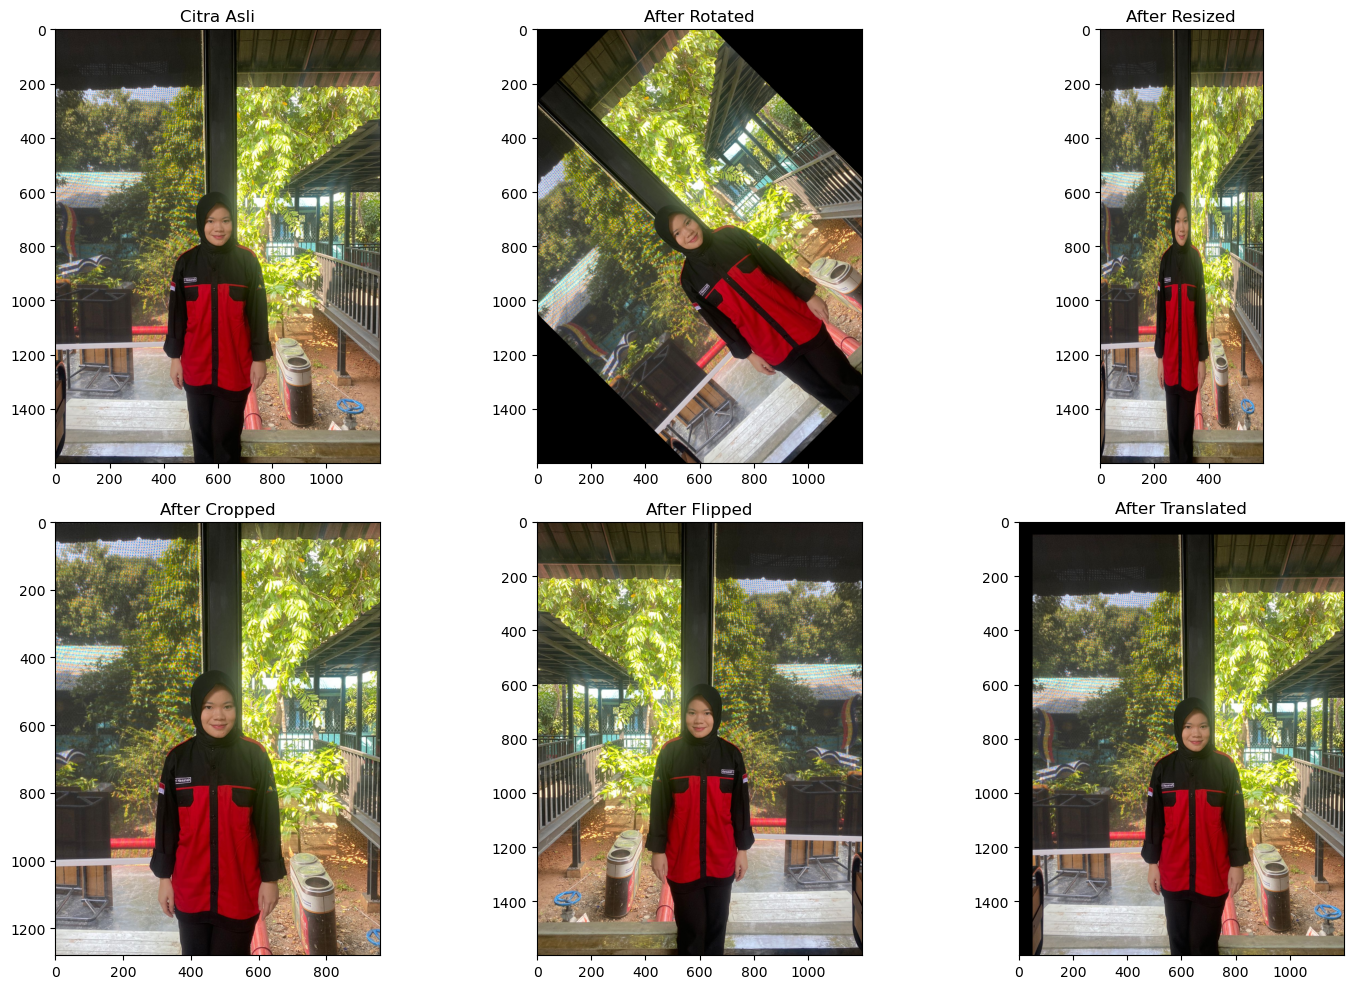

In [36]:
# Menampilkan hasil secara bersamaan
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].imshow(img_rgb)
axs[0, 0].set_title('Citra Asli')
axs[0, 0].axis('on')


axs[0, 1].imshow(img_rotated)
axs[0, 1].set_title('After Rotated')
axs[0, 1].axis('on')

axs[0, 2].imshow(img_resized)
axs[0, 2].set_title('After Resized')
axs[0, 2].axis('on')


axs[1, 0].imshow(img_cropped)
axs[1, 0].set_title('After Cropped')
axs[1, 0].axis('on')


axs[1, 1].imshow(img_flipped)
axs[1, 1].set_title('After Flipped')
axs[1, 1].axis('on')


axs[1, 2].imshow(img_translated)
axs[1, 2].set_title('After Translated')
axs[1, 2].axis('on')


plt.tight_layout()
plt.show()
